In [51]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

plt.style.use('ggplot')

In [31]:
load_path = r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\data\processed"

event_X_train = pd.read_pickle(os.path.join(load_path, "event_X_train.pkl"))
event_X_test = pd.read_pickle(os.path.join(load_path, "event_X_test.pkl"))

y_train = pd.read_pickle(os.path.join(load_path, "y_train.pkl"))
y_test = pd.read_pickle(os.path.join(load_path, "y_test.pkl"))

In [8]:
# sets hyperparameters
learning_rate_init = 0.05 # 0.001
n_iter_no_change = 10
scale_factor = (y_train == 0).sum() / (y_train == 1).sum()

In [12]:
# XGBoost Classifier
bdt = xgb.XGBClassifier(n_estimators=2000,
        learning_rate=learning_rate_init, 
        nthread=-1,
        random_state=1,
        max_depth=6,
        scale_pos_weight=scale_factor)

history = bdt.fit(event_X_train, y_train,
        early_stopping_rounds=n_iter_no_change,
        eval_set=[(event_X_test, y_test)],
        verbose=True,)

[18:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67989
[1]	validation_0-logloss:0.66795
[2]	validation_0-logloss:0.65706
[3]	validation_0-logloss:0.64716
[4]	validation_0-logloss:0.63807
[5]	validation_0-logloss:0.62965
[6]	validation_0-logloss:0.62193
[7]	validation_0-logloss:0.61491
[8]	validation_0-logloss:0.60839
[9]	validation_0-logloss:0.60241
[10]	validation_0-logloss:0.59692
[11]	validation_0-logloss:0.59193
[12]	validation_0-logloss:0.58728
[13]	validation_0-logloss:0.58295
[14]	validation_0-logloss:0.57897
[15]	validation_0-logloss:0.57532
[16]	validation_0-logloss:0.57193
[17]	validation_0-logloss:0.56887
[18]	validation_0-logloss:0.56604
[19]	validation_0-logloss:0.56329
[20]	validation_0-lo

In [53]:
save_path = r'C:\Users\Noaja\Downloads\msci_project\tth-ML-project\models\xgboost_model.model'
bdt.save_model(save_path)

In [57]:
bdt = xgb.Booster({'nthread': 4})  # init model
bdt.load_model(save_path)  # load data

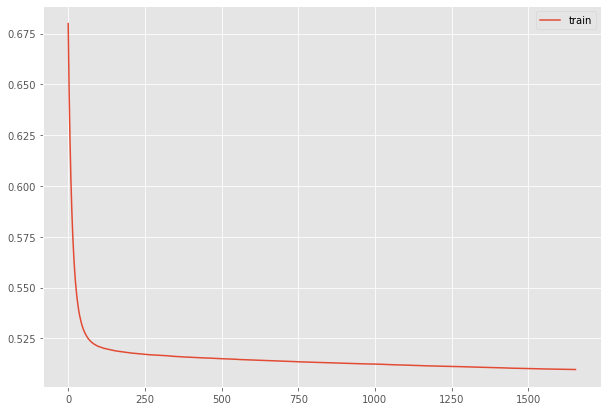

In [37]:
results = bdt.evals_result()

fig = plt.figure(figsize=(10,7))
plt.plot(results['validation_0']['logloss'], label='train')
plt.legend()
plt.show()